In [1]:
import pandas as pd
import numpy as np
import random

In [5]:
data=pd.read_csv('/JEOPARDY_CSV.csv' , header=0 , skiprows= lambda i: i>0 and random.random()>0.02)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4148 entries, 0 to 4147
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Show Number  4148 non-null   int64 
 1    Air Date    4148 non-null   object
 2    Round       4148 non-null   object
 3    Category    4148 non-null   object
 4    Value       4079 non-null   object
 5    Question    4148 non-null   object
 6    Answer      4148 non-null   object
dtypes: int64(1), object(6)
memory usage: 227.0+ KB


In [7]:
data.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$600,"No. 1: Lettered in hoops, football & lacrosse ...",Jim Brown
1,4680,2004-12-31,Double Jeopardy!,"""X""s & ""O""s",$400,Around 100 A.D. Tacitus wrote a book on how th...,oratory
2,3751,2000-12-18,Double Jeopardy!,IT'S OURS!,$1000,Northern Mariana Islands,USA
3,3673,2000-07-19,Jeopardy!,1994 FILMS,$200,"As mad bomber Howard Payne in this film, Denni...",Speed
4,4931,2006-02-06,Jeopardy!,EMOTICONS,$200,;-) Ocular act that sends a signal,winking


In [8]:
x=data[[' Question']]
x

,Question
0,"No. 1: Lettered in hoops, football & lacrosse ..."
1,Around 100 A.D. Tacitus wrote a book on how th...
2,Northern Mariana Islands
3,"As mad bomber Howard Payne in this film, Denni..."
4,;-) Ocular act that sends a signal
...,...
4143,It's the cone-shaped hat that a lazy or slow p...
4144,The first self-sustaining nuclear chain reacti...
4145,"(<a href=""http://www.j-archive.com/media/2006-..."
4146,It has a museum devoted to composer Zoltan Kodaly


In [10]:
with open('/stopwords.txt',encoding='utf8') as stopword_file:
  stopwords=stopword_file.readlines()
stopwords=[line.replace('\n','') for line in stopwords]
stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 "can't",
 'cannot',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 "let's",
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'same',
 "shan't",
 'she',
 "she'd",
 "she'll",
 "she's",
 'should',
 "s

In [12]:
import re
import nltk
from nltk import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
dataset=pd.DataFrame(columns=['title_body'])
for index,row in x.iterrows():
  title_body_tokenized = row[' Question'].split()
  title_body_tokenized_filtered=[w.lower() for w in title_body_tokenized if not w.lower() in stopwords ]
  s=re.sub('[^\w\s]','',' '.join(title_body_tokenized_filtered))
  s=re.sub('\d+','',s)
  dataset.loc[index]={'title_body':s}

In [14]:
dataset

,title_body
0,no lettered hoops football lacrosse syracuse...
1,ad tacitus wrote book art persuasive speaking...
2,northern mariana islands
3,mad bomber howard payne film dennis hopper pla...
4,ocular sends signal
...,...
4143,coneshaped hat lazy slow pupil wore punishment
4144,selfsustaining nuclear chain reaction italiana...
4145,a hrefhttpwwwjarchivecommedia_j_jpg target_bla...
4146,museum devoted composer zoltan kodaly


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
vectorizer=TfidfVectorizer()

In [17]:
vectorizer.fit(dataset['title_body'])

TfidfVectorizer()

In [18]:
x=vectorizer.transform(dataset['title_body'])

In [19]:
from sklearn.cluster import SpectralClustering,MeanShift,KMeans,DBSCAN

In [20]:
msh=SpectralClustering()

In [21]:
msh.fit(x)

SpectralClustering()

In [22]:
np.unique(msh.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
silhouette_score(x,msh.labels_)

0.003948328544020244

In [25]:
dataset['msh_cluster']=msh.labels_

In [26]:
dataset[dataset['msh_cluster']==2]

,title_body,msh_cluster
67,thrush judgment type bird a hrefhttpwwwjarchiv...,2
129,foothigh landmark a hrefhttpwwwjarchivecommedi...,2
130,washington journalist jeopardy stalwart a hre...,2
152,creature a hrefhttpwwwjarchivecommedia_j_jpg t...,2
174,poker a hrefhttpwwwjarchivecommedia_j_jpg targ...,2
210,domesticated critter a hrefhttpwwwjarchivecomm...,2
241,a hrefhttpwwwjarchivecommedia_dj_jpg target_bl...,2
564,s band named seattle art installation a hrefht...,2
659,a hrefhttpwwwjarchivecommedia_j_jpg target_bla...,2
661,leaders a hrefhttpwwwjarchivecommedia_j_jpg t...,2


In [27]:
from collections import Counter

In [28]:
Counter(' '.join(dataset[dataset['msh_cluster']==2]['title_body']).split(' ')).most_common(20)

[('a', 71),
 ('target_blankherea', 54),
 ('hrefhttpwwwjarchivecommedia_j_jpg', 34),
 ('hrefhttpwwwjarchivecommedia_dj_jpg', 26),
 ('', 20),
 ('type', 9),
 ('named', 5),
 ('hrefhttpwwwjarchivecommedia_j_ajpg', 5),
 ('target_blankthisa', 4),
 ('hrefhttpwwwjarchivecommedia_dj_ajpg', 4),
 ('target_blankseena', 4),
 ('bird', 3),
 ('woman', 3),
 ('girl', 3),
 ('designed', 2),
 ('s', 2),
 ('critter', 2),
 ('water', 2),
 ('us', 2),
 ('american', 2)]

**Finding the optimal cluster count for the KMeans algorithm**

In [29]:
wcss={}
for k in range(1,11):
  kmeans=KMeans(n_clusters=k, init='k-means++' , max_iter=500)
  kmeans.fit(x)
  wcss[k]=kmeans.inertia_

In [30]:
import seaborn as sns

<Axes: >

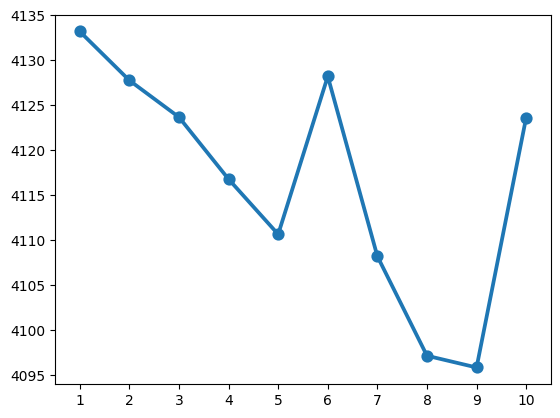

In [31]:
sns.pointplot(x=list(wcss.keys()) , y=list(wcss.values()))

In [35]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=500)

In [36]:
kmeans.fit(x)

KMeans(max_iter=500, n_clusters=5)

In [37]:
kmeans.inertia_

4114.316560356166

In [38]:
dataset['kmeans-cluster']=kmeans.labels_

In [39]:
silhouette_score(x,kmeans.labels_)

0.0014296222574294978

In [40]:
dbscan=DBSCAN(eps=0.9 , min_samples=250)

In [41]:
dbscan.fit(x)

DBSCAN(eps=0.9, min_samples=250)

In [42]:
np.unique(dbscan.labels_)

array([-1])

In [43]:
meanshift=MeanShift()

In [44]:
meanshift.fit(x.toarray())

MeanShift()

In [45]:
np.unique(meanshift.labels_)

array([0])